In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/telecom_churn.csv')

Prepare Data

In [4]:
# preview data
df.info()
df.head
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB
      Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
0         0           128                1         1       2.70   
1         0           107                1         1       3.70   
2         0           137                1

Handling Missing Data

In [5]:
# Replace the field values with Fales or True based on MISSING VALUES
df.isna()
# check how many missing values in each column
missing = df.isna().sum()
# convert those numbers into percentages by dividing the counts by the number of records
missingpercentages = missing/len(df)*100
print(missingpercentages)

Churn              0.0
AccountWeeks       0.0
ContractRenewal    0.0
DataPlan           0.0
DataUsage          0.0
CustServCalls      0.0
DayMins            0.0
DayCalls           0.0
MonthlyCharge      0.0
OverageFee         0.0
RoamMins           0.0
dtype: float64


Convert integer variables to a categorical variable

In [6]:
df['Churn'] = df['Churn'].astype('category')
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [7]:
#examine the distribution of the response variable
#Response counts
churn_counts = df['Churn'].value_counts()
print(churn_counts)

Churn
0    2850
1     483
Name: count, dtype: int64


**Model #1 - Full Logistic Regression Model using Statsmodels**

Train Test Split for the full model

In [8]:
#Train Test Split for the full model
#split the data into trainin and testing sets
X = df.drop(['Churn'], axis=1)
# Fit logistic regression model
X = df[['AccountWeeks','ContractRenewal','DataPlan','DataUsage','CustServCalls','DayMins','DayCalls','MonthlyCharge','OverageFee','RoamMins']]
#create dummy variables for nominal inputs
X = pd.get_dummies(X,drop_first=True)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2333 entries, 2016 to 3174
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AccountWeeks     2333 non-null   int64  
 1   ContractRenewal  2333 non-null   int64  
 2   DataPlan         2333 non-null   int64  
 3   DataUsage        2333 non-null   float64
 4   CustServCalls    2333 non-null   int64  
 5   DayMins          2333 non-null   float64
 6   DayCalls         2333 non-null   int64  
 7   MonthlyCharge    2333 non-null   float64
 8   OverageFee       2333 non-null   float64
 9   RoamMins         2333 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 200.5 KB
<class 'pandas.core.series.Series'>
Index: 2333 entries, 2016 to 3174
Series name: Churn
Non-Null Count  Dtype   
--------------  -----   
2333 non-null   category
dtypes: category(1)
memory usage: 20.6 KB


Model #1 - Full Logistic Regression Model using Statsmodels

In [9]:
#Fit full logistic regression model to examine the significance of the terms
X = X_train
X = sm.add_constant(X)
y = y_train

logit_full = sm.Logit(y, X).fit()

#Print summary
print(logit_full.summary())

Optimization terminated successfully.
         Current function value: 0.330579
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 2333
Model:                          Logit   Df Residuals:                     2322
Method:                           MLE   Df Model:                           10
Date:                Mon, 18 Nov 2024   Pseudo R-squ.:                  0.2039
Time:                        16:09:31   Log-Likelihood:                -771.24
converged:                       True   LL-Null:                       -968.75
Covariance Type:            nonrobust   LLR p-value:                 1.078e-78
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -5.3633      0.656     -8.179      0.000      -6.649      -4.078
AccountWeeks  

Evaluate Full Model on Training and Test Set

In [10]:
# Generate predicted values for training set
pprob = logit_full.predict(X)

# Create predicted category for success using 50% cutoff
psuccess = (pprob > 0.5).astype(int)

# Add new variables to the training data set
X_train['p_success'] = psuccess
X_train['p_prob'] = pprob
X_train['y'] = y_train

X_train.info()


# Generate predicted values for test set

X_test = sm.add_constant(X_test)

pprob_test = logit_full.predict(X_test)

# Create predicted category for success using 50% cutoff
psuccess_test = (pprob_test > 0.5).astype(int)

# Add new variables to the response data set
X_test['p_success'] = psuccess_test
X_test['p_prob'] = pprob_test

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2333 entries, 2016 to 3174
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   AccountWeeks     2333 non-null   int64   
 1   ContractRenewal  2333 non-null   int64   
 2   DataPlan         2333 non-null   int64   
 3   DataUsage        2333 non-null   float64 
 4   CustServCalls    2333 non-null   int64   
 5   DayMins          2333 non-null   float64 
 6   DayCalls         2333 non-null   int64   
 7   MonthlyCharge    2333 non-null   float64 
 8   OverageFee       2333 non-null   float64 
 9   RoamMins         2333 non-null   float64 
 10  p_success        2333 non-null   int64   
 11  p_prob           2333 non-null   float64 
 12  y                2333 non-null   category
dtypes: category(1), float64(6), int64(6)
memory usage: 239.3 KB
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 438 to 1159
Data columns (total 13 columns):
 #   Column          

Generate confusion matrices for training and test sets

In [11]:
# Generate confusion matrix for training set
conf_matrix = confusion_matrix(psuccess, y_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(psuccess_test, y_test)
print(conf_matrix)

[[1937  275]
 [  56   65]]
[[838 114]
 [ 19  29]]


Create ROC curves for training and test sets

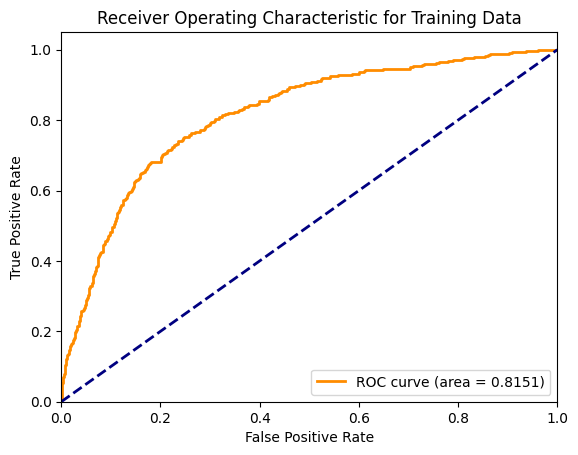

In [12]:
# Generate ROC curve for training data
fpr, tpr, thresholds = roc_curve(y_train.cat.codes, pprob)
roc_auc = roc_auc_score(y_train.cat.codes, pprob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

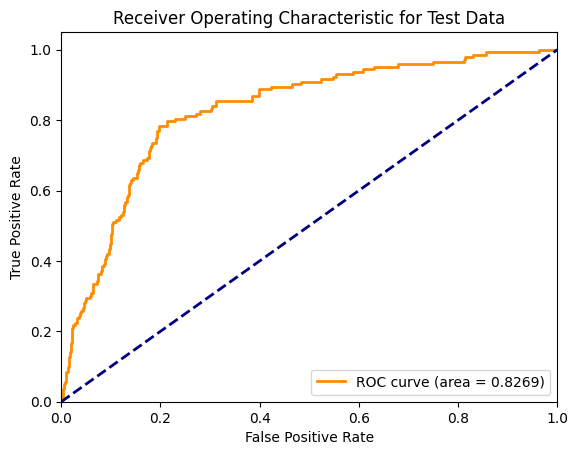

In [13]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, pprob_test)
roc_auc = roc_auc_score(y_test.cat.codes, pprob_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()

Compute Accuracy, Precision, Recall for training and test sets

In [14]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, psuccess)
prec_train = precision_score(y_train, psuccess)
rec_train = recall_score(y_train, psuccess)

# print the scores

print("Accuracy (Train) : {:.4f}".format(acc_train))
print("Precision (Train): {:.4f}".format(prec_train))
print("Recall (Train)  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, psuccess_test)
prec_test = precision_score(y_test, psuccess_test)
rec_test = recall_score(y_test, psuccess_test)

# print the scores

print("Accuracy (Test) : {:.4f}".format(acc_test))
print("Precision (Test): {:.4f}".format(prec_test))
print("Recall (Test)  : {:.4f}".format(rec_test))
print("")

Accuracy (Train) : 0.8581
Precision (Train): 0.5372
Recall (Train)  : 0.1912

Accuracy (Test) : 0.8670
Precision (Test): 0.6042
Recall (Test)  : 0.2028



Model #2 - Continuing with the statsmodels implementation, fit a reduced logistic regression (from stepwise variable selection)

In [15]:
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.01,
                       threshold_out = 0.05,
                       verbose=True):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS

    Arguments:
        X - pandas.DataFrame of numeric features
        y - vector, series of the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions

    Returns: list of selected features

    Example Call: stepwise_selection(X, y)
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print(f'Add  {best_feature} with p-value {best_pval:.4f}')
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Drop {worst_feature} with p-value {worst_pval:.4f}')
        if not changed:
           break
    return included

In [16]:
selected_features = stepwise_selection(X, y)
print('resulting features:')
print(selected_features)

Add  const with p-value 0.0000
Add  ContractRenewal with p-value 0.0000
Add  CustServCalls with p-value 0.0000
Add  DayMins with p-value 0.0000
Add  DataPlan with p-value 0.0000
Add  OverageFee with p-value 0.0000
Add  RoamMins with p-value 0.0001
resulting features:
['const', 'ContractRenewal', 'CustServCalls', 'DayMins', 'DataPlan', 'OverageFee', 'RoamMins']


In [17]:
#split the data into trainin and testing sets
X2 = df.drop(['Churn'], axis=1)
# Fit logistic regression model
X2 = df[['ContractRenewal','CustServCalls','DataPlan','DayMins','OverageFee','RoamMins']]
#create dummy variables for nominal inputs
X2 = pd.get_dummies(X2,drop_first=True)
y2 = df['Churn']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

X2_train.info()
y2_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2333 entries, 2016 to 3174
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ContractRenewal  2333 non-null   int64  
 1   CustServCalls    2333 non-null   int64  
 2   DataPlan         2333 non-null   int64  
 3   DayMins          2333 non-null   float64
 4   OverageFee       2333 non-null   float64
 5   RoamMins         2333 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 127.6 KB
<class 'pandas.core.series.Series'>
Index: 2333 entries, 2016 to 3174
Series name: Churn
Non-Null Count  Dtype   
--------------  -----   
2333 non-null   category
dtypes: category(1)
memory usage: 20.6 KB


In [18]:
#Fit reduced (stepwise) logistic regression model to examine the significance of the terms
X2 = X2_train
X2 = sm.add_constant(X2)
y2 = y2_train

logit_step = sm.Logit(y2, X2).fit()

#Print summary
print(logit_step.summary())

Optimization terminated successfully.
         Current function value: 0.330620
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 2333
Model:                          Logit   Df Residuals:                     2326
Method:                           MLE   Df Model:                            6
Date:                Mon, 18 Nov 2024   Pseudo R-squ.:                  0.2038
Time:                        16:09:34   Log-Likelihood:                -771.34
converged:                       True   LL-Null:                       -968.75
Covariance Type:            nonrobust   LLR p-value:                 3.603e-82
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -5.2867      0.512    -10.325      0.000      -6.290      -4.283
ContractRenewa

In [19]:
# Generate predicted values for training set
pprob2 = logit_step.predict(X2)

# Create predicted category for success using 50% cutoff
psuccess2 = (pprob2 > 0.5).astype(int)

# Add new variables to the training data set
X2_train['p_success'] = psuccess2
X2_train['p_prob'] = pprob2
X2_train['y'] = y2_train

X2_train.info()


# Generate predicted values for test set

X2_test = sm.add_constant(X2_test)

pprob2_test = logit_step.predict(X2_test)

# Create predicted category for success using 50% cutoff
psuccess2_test = (pprob2_test > 0.5).astype(int)

# Add new variables to the response data set
X2_test['p_success'] = psuccess2_test
X2_test['p_prob'] = pprob2_test

X2_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2333 entries, 2016 to 3174
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ContractRenewal  2333 non-null   int64   
 1   CustServCalls    2333 non-null   int64   
 2   DataPlan         2333 non-null   int64   
 3   DayMins          2333 non-null   float64 
 4   OverageFee       2333 non-null   float64 
 5   RoamMins         2333 non-null   float64 
 6   p_success        2333 non-null   int64   
 7   p_prob           2333 non-null   float64 
 8   y                2333 non-null   category
dtypes: category(1), float64(4), int64(4)
memory usage: 166.4 KB
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 438 to 1159
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   const            1000 non-null   float64
 1   ContractRenewal  1000 non-null   int64  
 2   CustServCalls    1000 

In [20]:
# Generate confusion matrix for training set
conf_matrix = confusion_matrix(psuccess2, y2_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(psuccess2_test, y2_test)
print(conf_matrix)

[[1938  275]
 [  55   65]]
[[838 113]
 [ 19  30]]


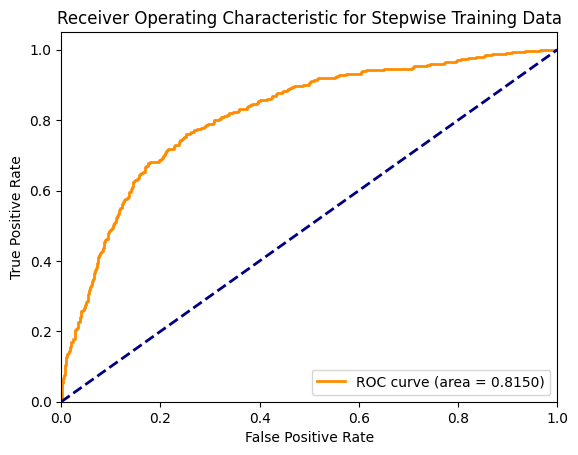

In [21]:
# Generate ROC curve for training data
fpr, tpr, thresholds = roc_curve(y2_train.cat.codes, pprob2)
roc_auc = roc_auc_score(y2_train.cat.codes, pprob2)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Stepwise Training Data')
plt.legend(loc='lower right')
plt.show()

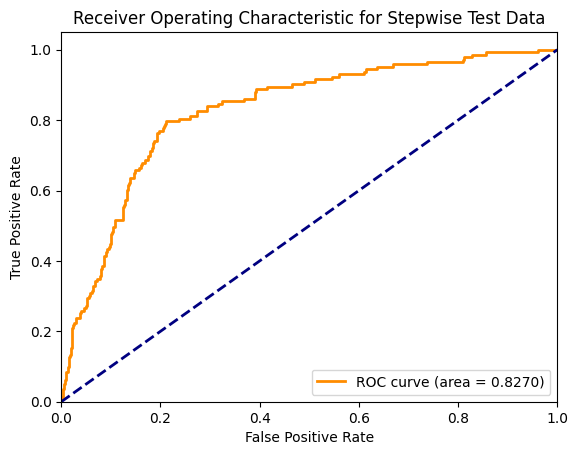

In [22]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y2_test.cat.codes, pprob2_test)
roc_auc = roc_auc_score(y2_test.cat.codes, pprob2_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Stepwise Test Data')
plt.legend(loc='lower right')
plt.show()

In [23]:
# calculate the accuracy, precision, and recall scores
acc_train2 = accuracy_score(y2_train, psuccess2)
prec_train2 = precision_score(y2_train, psuccess2)
rec_train2 = recall_score(y2_train, psuccess2)

# print the scores

print("Accuracy (Train) : {:.4f}".format(acc_train2))
print("Precision (Train): {:.4f}".format(prec_train2))
print("Recall (Train)  : {:.4f}".format(rec_train2))
print("")

# calculate the accuracy, precision, and recall scores
acc_test2 = accuracy_score(y2_test, psuccess2_test)
prec_test2 = precision_score(y2_test, psuccess2_test)
rec_test2 = recall_score(y2_test, psuccess2_test)

# print the scores

print("Accuracy (Test) : {:.4f}".format(acc_test2))
print("Precision (Test): {:.4f}".format(prec_test2))
print("Recall (Test)  : {:.4f}".format(rec_test2))
print("")

Accuracy (Train) : 0.8586
Precision (Train): 0.5417
Recall (Train)  : 0.1912

Accuracy (Test) : 0.8680
Precision (Test): 0.6122
Recall (Test)  : 0.2098



Sklearn Implementation with L1 and L2 Regularization (LASSP, Ridge Regression, Elastic Net)

In [24]:
#split the data into trainin and testing sets
X3 = df.drop(['Churn'], axis=1)
# Fit logistic regression model
X3 = df[['AccountWeeks','ContractRenewal','DataPlan','DataUsage','CustServCalls','DayMins','DayCalls','MonthlyCharge','OverageFee','RoamMins']]
#create dummy variables for nominal inputs
y3 = df['Churn']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

X3_train.info()
y3_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2333 entries, 2016 to 3174
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AccountWeeks     2333 non-null   int64  
 1   ContractRenewal  2333 non-null   int64  
 2   DataPlan         2333 non-null   int64  
 3   DataUsage        2333 non-null   float64
 4   CustServCalls    2333 non-null   int64  
 5   DayMins          2333 non-null   float64
 6   DayCalls         2333 non-null   int64  
 7   MonthlyCharge    2333 non-null   float64
 8   OverageFee       2333 non-null   float64
 9   RoamMins         2333 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 200.5 KB
<class 'pandas.core.series.Series'>
Index: 2333 entries, 2016 to 3174
Series name: Churn
Non-Null Count  Dtype   
--------------  -----   
2333 non-null   category
dtypes: category(1)
memory usage: 20.6 KB


Fit Logistic Regression Models using L1, L2, and Elastic Net

In [25]:
# Create an Instance of Logistic Regression for LASSO Selection  using c = 0.1 and c = 0.01

lr_l1_1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
lr_l1_01 = LogisticRegression(penalty='l1', solver='liblinear', C=0.01)

# fit the models to the training data
lr_l1_1.fit(X3_train, y3_train)
lr_l1_01.fit(X3_train, y3_train)

# Create an Instance of Logistic Regression for Ridge Regression (L2 regularization)
lr_l2 = LogisticRegression(penalty='l2', solver='liblinear')

# Create an instance of Logistic Regression for Elastic Net
lr_l12 = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga')

# fit the models to the training data
lr_l2.fit(X3_train, y3_train)
lr_l12.fit(X3_train, y3_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [26]:
# function for model coefficents
def rpt_model_variables(model):
    # Get the intercept term
    intercept = model.intercept_

    # Access the coefficients (weights) of the model, i rounded them
    coefficients = np.round(model.coef_[0],decimals=4)

    # Create DataFrames for intercept and coefficients
    #df_intercept = pd.DataFrame({'feature': ['Intercept'], 'coefficient': [intercept[0]]})
    df_coefficients = pd.DataFrame({'feature': X3.columns, 'coefficient': coefficients})
    df_coefficients['abs_coefficient'] = df_coefficients['coefficient'].abs()
    df_coefficients.sort_values(by='abs_coefficient', ascending=False, inplace=True)

    # if you want to add intercept to table
    #df_model = pd.concat([df_intercept, df_coefficients]).reset_index(drop=True)

    # Print the DataFrame
    print(df_coefficients)

    return df_coefficients

df_coefficients1 = rpt_model_variables(lr_l1_1)
df_coefficients01 = rpt_model_variables(lr_l1_01)
df_coefficients2 = rpt_model_variables(lr_l2)
df_coefficients12 = rpt_model_variables(lr_l12)

           feature  coefficient  abs_coefficient
1  ContractRenewal      -2.0240           2.0240
4    CustServCalls       0.4051           0.4051
8       OverageFee       0.0915           0.0915
9         RoamMins       0.0435           0.0435
7    MonthlyCharge      -0.0272           0.0272
5          DayMins       0.0128           0.0128
6         DayCalls      -0.0102           0.0102
0     AccountWeeks      -0.0021           0.0021
2         DataPlan       0.0000           0.0000
3        DataUsage       0.0000           0.0000
           feature  coefficient  abs_coefficient
4    CustServCalls       0.1561           0.1561
7    MonthlyCharge      -0.0214           0.0214
6         DayCalls      -0.0198           0.0198
5          DayMins       0.0082           0.0082
0     AccountWeeks      -0.0034           0.0034
1  ContractRenewal       0.0000           0.0000
2         DataPlan       0.0000           0.0000
3        DataUsage       0.0000           0.0000
8       OverageFee  

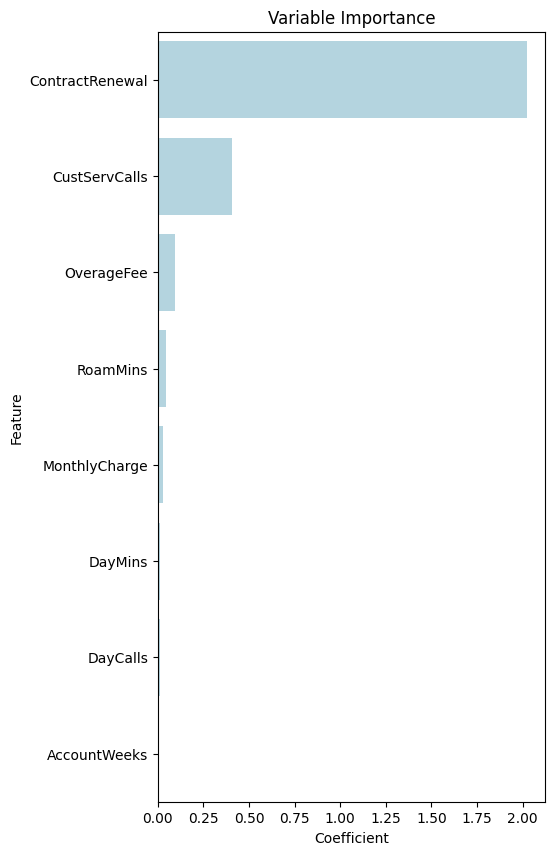

-- rejected --
 DataPlan
 DataUsage


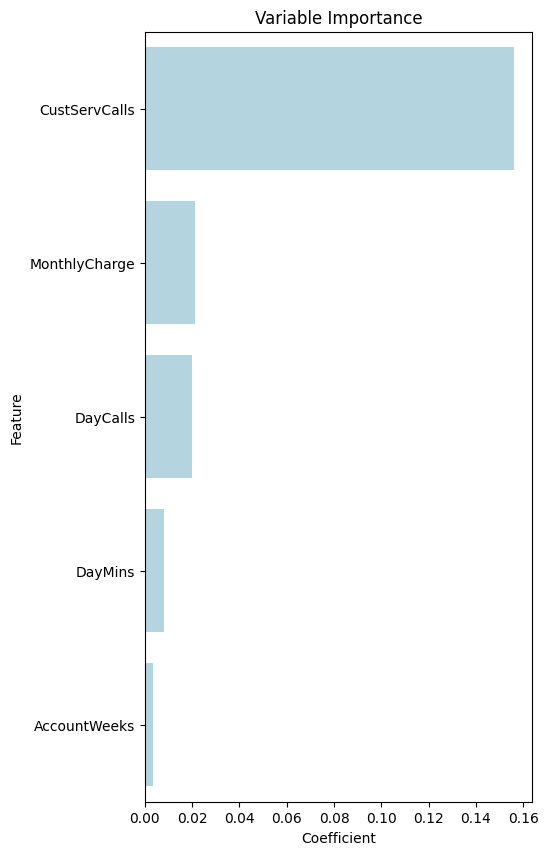

-- rejected --
 ContractRenewal
 DataPlan
 DataUsage
 OverageFee
 RoamMins


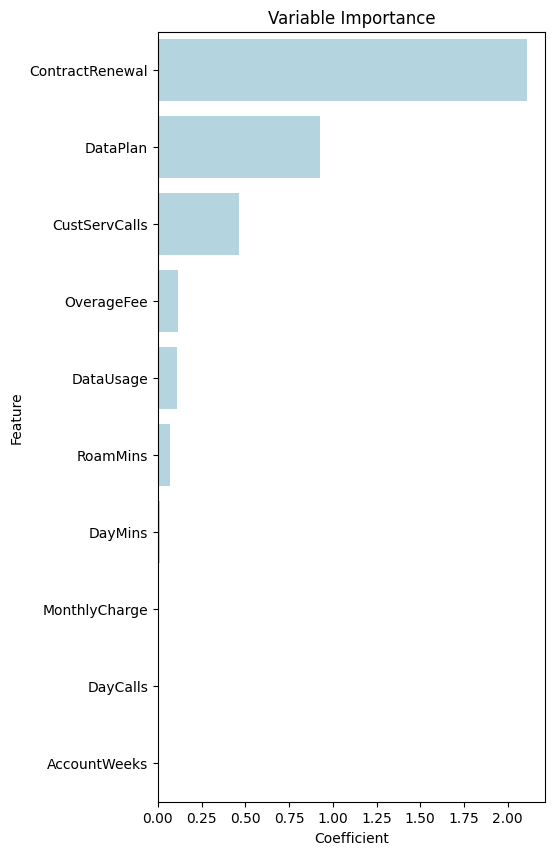

-- rejected --


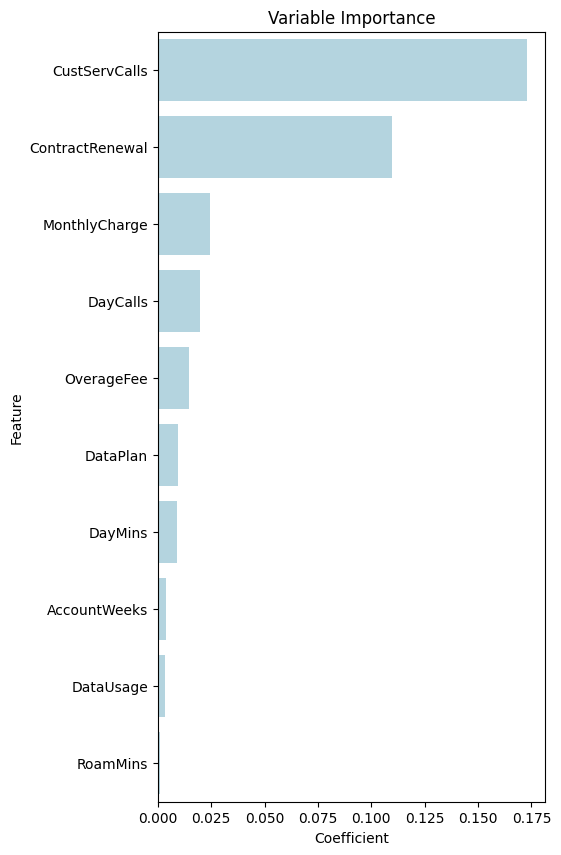

-- rejected --


In [27]:
# plot variable importance
def plot_variable_imp(df_coef):
  df_plt = df_coef[df_coef['abs_coefficient'] != 0]
  reject_vars = df_coef[df_coef['abs_coefficient'] == 0]['feature'].tolist()

  plt.figure(figsize=(5, 10))
  plt.title('Variable Importance')
  plt.xlabel('Coefficient')
  plt.ylabel('Feature')
  sns.barplot(data=df_plt,
                     y=df_plt['feature'],
                     x=df_plt['abs_coefficient'], color="lightblue")

  plt.show()
  print("-- rejected --")
  for i in reject_vars:
    print(f" {i}")

plot_variable_imp(df_coefficients1)
plot_variable_imp(df_coefficients01)
plot_variable_imp(df_coefficients2)
plot_variable_imp(df_coefficients12)

Make Predictions on the training and testing data for each model

In [28]:
# make predictions on the testing data
y_pred_train = lr_l1_1.predict(X3_train)
y_pred_test = lr_l1_1.predict(X3_test)
y_proba_train = lr_l1_1.predict_proba(X3_train)
y_proba_test = lr_l1_1.predict_proba(X3_test)

y_pred_train1 = lr_l1_01.predict(X3_train)
y_pred_test1 = lr_l1_01.predict(X3_test)
y_proba_train1 = lr_l1_01.predict_proba(X3_train)
y_proba_test1 = lr_l1_01.predict_proba(X3_test)

y_pred_train2 = lr_l2.predict(X3_train)
y_pred_test2 = lr_l2.predict(X3_test)
y_proba_train2 = lr_l2.predict_proba(X3_train)
y_proba_test2 = lr_l2.predict_proba(X3_test)

y_pred_train12 = lr_l12.predict(X3_train)
y_pred_test12 = lr_l12.predict(X3_test)
y_proba_train12 = lr_l12.predict_proba(X3_train)
y_proba_test12 = lr_l12.predict_proba(X3_test)

Calculate Accuracy, Precision, Recall for each model on training and test set

In [29]:
# L1 with c= 0.1

In [30]:
# calculate the accuracy, precision, and recall scores
acc3_train = accuracy_score(y3_train, y_pred_train)
prec3_train = precision_score(y3_train, y_pred_train)
rec3_train = recall_score(y3_train, y_pred_train)
auc3_train = roc_auc_score(y3_train, y_proba_train[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train))
print("Precision: {:.4f}".format(prec3_train))
print("Recall.  : {:.4f}".format(rec3_train))
print("AUC      : {:.4f}".format(auc3_train))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test = accuracy_score(y3_test, y_pred_test)
prec3_test = precision_score(y3_test, y_pred_test)
rec3_test = recall_score(y3_test, y_pred_test)
auc3_test = roc_auc_score(y3_test, y_proba_test[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test))
print("Precision: {:.4f}".format(prec3_test))
print("Recall.  : {:.4f}".format(rec3_test))
print("AUC      : {:.4f}".format(auc3_test))

 -- train set -- 
Accuracy : 0.8573
Precision: 0.5376
Recall.  : 0.1471
AUC      : 0.8048

 -- test set -- 
Accuracy : 0.8560
Precision: 0.4884
Recall.  : 0.1469
AUC      : 0.8099


In [31]:
# L1 with c = 0.01

In [32]:
# calculate the accuracy, precision, and recall scores
acc3_train1 = accuracy_score(y3_train, y_pred_train1)
prec3_train1 = precision_score(y3_train, y_pred_train1)
rec3_train1 = recall_score(y3_train, y_pred_train1)
auc3_train1 = roc_auc_score(y3_train, y_proba_train1[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train1))
print("Precision: {:.4f}".format(prec3_train1))
print("Recall.  : {:.4f}".format(rec3_train1))
print("AUC      : {:.4f}".format(auc3_train1))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test1 = accuracy_score(y3_test, y_pred_test1)
prec3_test1 = precision_score(y3_test, y_pred_test1)
rec3_test1 = recall_score(y3_test, y_pred_test1)
auc3_test1 = roc_auc_score(y3_test, y_proba_test1[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test1))
print("Precision: {:.4f}".format(prec3_test1))
print("Recall.  : {:.4f}".format(rec3_test1))
print("AUC      : {:.4f}".format(auc3_test1))

 -- train set -- 
Accuracy : 0.8551
Precision: 1.0000
Recall.  : 0.0059
AUC      : 0.6245

 -- test set -- 
Accuracy : 0.8570
Precision: 0.0000
Recall.  : 0.0000
AUC      : 0.6287


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
# L2 regularization

In [34]:
# calculate the accuracy, precision, and recall scores
acc3_train2 = accuracy_score(y3_train, y_pred_train2)
prec3_train2 = precision_score(y3_train, y_pred_train2)
rec3_train2 = recall_score(y3_train, y_pred_train2)
auc3_train2 = roc_auc_score(y3_train, y_proba_train2[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train2))
print("Precision: {:.4f}".format(prec3_train2))
print("Recall.  : {:.4f}".format(rec3_train2))
print("AUC      : {:.4f}".format(auc3_train2))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test2 = accuracy_score(y3_test, y_pred_test2)
prec3_test2 = precision_score(y3_test, y_pred_test2)
rec3_test2 = recall_score(y3_test, y_pred_test2)
auc3_test2 = roc_auc_score(y3_test, y_proba_test2[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test2))
print("Precision: {:.4f}".format(prec3_test2))
print("Recall.  : {:.4f}".format(rec3_test2))
print("AUC      : {:.4f}".format(auc3_test2))

 -- train set -- 
Accuracy : 0.8590
Precision: 0.5534
Recall.  : 0.1676
AUC      : 0.8153

 -- test set -- 
Accuracy : 0.8580
Precision: 0.5102
Recall.  : 0.1748
AUC      : 0.8250


In [35]:
# Elastic Net

In [36]:
# calculate the accuracy, precision, and recall scores
acc3_train12 = accuracy_score(y3_train, y_pred_train12)
prec3_train12 = precision_score(y3_train, y_pred_train12)
rec3_train12 = recall_score(y3_train, y_pred_train12)
auc3_train12 = roc_auc_score(y3_train, y_proba_train12[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train12))
print("Precision: {:.4f}".format(prec3_train12))
print("Recall.  : {:.4f}".format(rec3_train12))
print("AUC      : {:.4f}".format(auc3_train12))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test12 = accuracy_score(y3_test, y_pred_test12)
prec3_test12 = precision_score(y3_test, y_pred_test12)
rec3_test12 = recall_score(y3_test, y_pred_test12)
auc3_test12 = roc_auc_score(y3_test, y_proba_test12[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test12))
print("Precision: {:.4f}".format(prec3_test12))
print("Recall.  : {:.4f}".format(rec3_test12))
print("AUC      : {:.4f}".format(auc3_test12))

 -- train set -- 
Accuracy : 0.8551
Precision: 0.7500
Recall.  : 0.0088
AUC      : 0.6460

 -- test set -- 
Accuracy : 0.8580
Precision: 1.0000
Recall.  : 0.0070
AUC      : 0.6503


Decision Tree

In [37]:
###### Default Tree

In [38]:
#split the data into trainin and testing sets
X = df.drop(['Churn'], axis=1)
# Fit logistic regression model
X = df[['AccountWeeks','ContractRenewal','DataPlan','DataUsage','CustServCalls','DayMins','DayCalls','MonthlyCharge','OverageFee','RoamMins']]
#create dummy variables for nominal inputs
X = pd.get_dummies(X,drop_first=True)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2333 entries, 2016 to 3174
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AccountWeeks     2333 non-null   int64  
 1   ContractRenewal  2333 non-null   int64  
 2   DataPlan         2333 non-null   int64  
 3   DataUsage        2333 non-null   float64
 4   CustServCalls    2333 non-null   int64  
 5   DayMins          2333 non-null   float64
 6   DayCalls         2333 non-null   int64  
 7   MonthlyCharge    2333 non-null   float64
 8   OverageFee       2333 non-null   float64
 9   RoamMins         2333 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 200.5 KB
<class 'pandas.core.series.Series'>
Index: 2333 entries, 2016 to 3174
Series name: Churn
Non-Null Count  Dtype   
--------------  -----   
2333 non-null   category
dtypes: category(1)
memory usage: 20.6 KB


Does anyone know what are the default values? Or we can choose any numbers

In [60]:
# create an instance of a decision tree classifier using default values

dt = DecisionTreeClassifier(max_depth = None, min_samples_leaf= 1, ccp_alpha = 0)

# fit the model to the training data
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0)

In [61]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
# visualize the decision tree
dot_data = export_graphviz(dt, filled=True, rounded=True, feature_names=X.columns, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render("default decision_tree")

'default decision_tree.pdf'

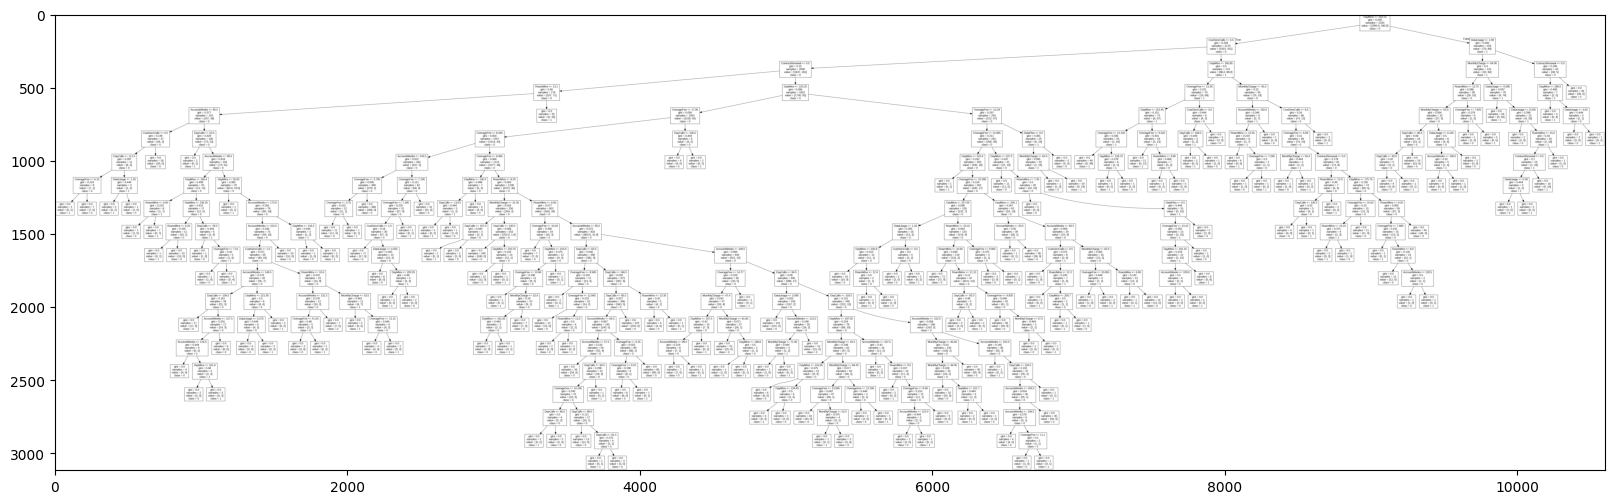

In [62]:
export_graphviz(dt,
                'tree.dot',
                class_names=['0','1'],
                feature_names = X_train.columns)
! dot -Tpng tree.dot -o tree.png

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 40))
plt.imshow(img)

Make predictions on the training and test data

In [63]:
# make predictions on the training and test data
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

y_prob_train = dt.predict_proba(X_train)
y_prob_test = dt.predict_proba(X_test)

Assess Model on Training and Test Data

In [64]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 1.0000
Precision: 1.0000
Recall.  : 1.0000

 -- test set -- 
Accuracy : 0.8830
Precision: 0.5844
Recall.  : 0.6294


Generate a confusion matrix for the training and test data

In [65]:
# confusion matrix
conf_matrix = confusion_matrix(y_pred_train, y_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(y_pred_test, y_test)
print(conf_matrix)

[[1993    0]
 [   0  340]]
[[793  53]
 [ 64  90]]


Generate ROC curves for training and test data

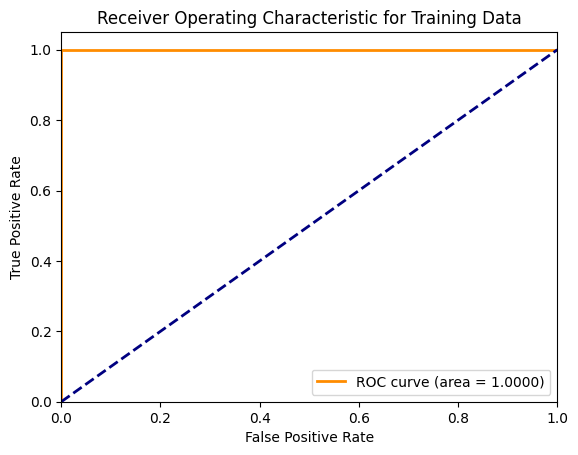

In [66]:
# Generate ROC curve for training data

fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_prob_train[:,1])
roc_auc = roc_auc_score(y_train.cat.codes, y_prob_train[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

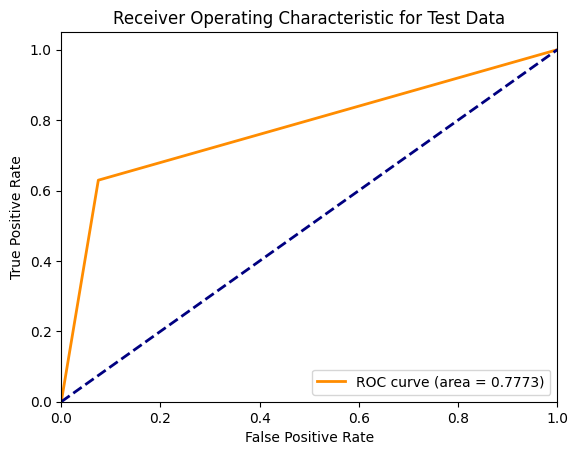

In [67]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_prob_test[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_prob_test[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()

Print feature importance for the tree

   importance          feature
5    0.271653          DayMins
8    0.125646       OverageFee
4    0.118278    CustServCalls
9    0.117616         RoamMins
7    0.089085    MonthlyCharge
1    0.081891  ContractRenewal
3    0.068670        DataUsage
0    0.063797     AccountWeeks
6    0.047403         DayCalls
2    0.015960         DataPlan


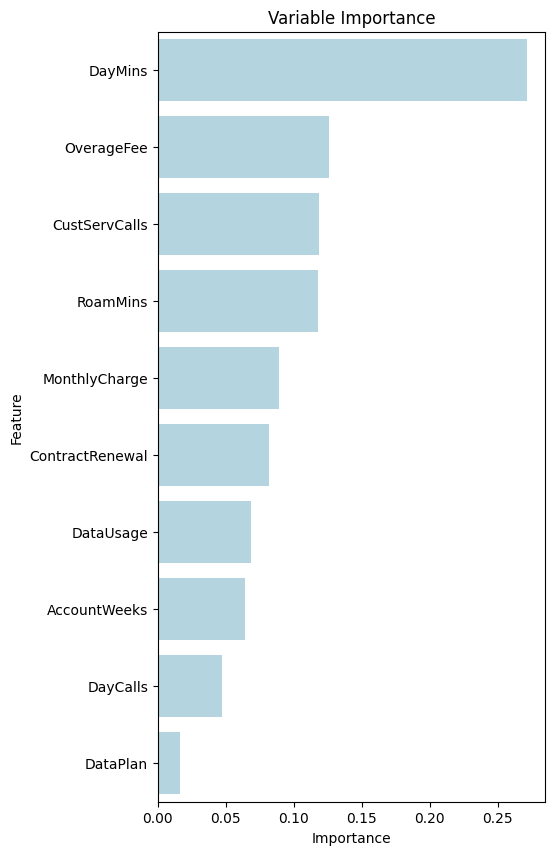

In [68]:
#calculate feature importance
tree_imp = dt.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = tree_imp,
                  columns = column_values)
df['feature']=X.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False)

print(df2)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()

Tune Parameters of the Classification Tree

In [59]:
# create a turned tree
dt_tune = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 10, 20, 50, 100],
    'ccp_alpha': [0, 0.001, 0.01, 0.1, 0.5, 1]
}

grid_search = GridSearchCV(dt_tune, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(best_params)
print(best_estimator)

{'ccp_alpha': 0.001, 'max_depth': 5, 'min_samples_leaf': 10}
DecisionTreeClassifier(ccp_alpha=0.001, max_depth=5, min_samples_leaf=10)


In [49]:
# create an instance of a decision tree classifier using turned values

dt2 = DecisionTreeClassifier(max_depth = 5, min_samples_leaf= 10, ccp_alpha = 0.001)

# fit the model to the training data
dt2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=5, min_samples_leaf=10)

In [50]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
# visualize the decision tree
dot_data2 = export_graphviz(dt, filled=True, rounded=True, feature_names=X.columns, class_names=['0', '1'])
graph2 = graphviz.Source(dot_data)
graph2.render("Turned decision_tree")

'Turned decision_tree.pdf'

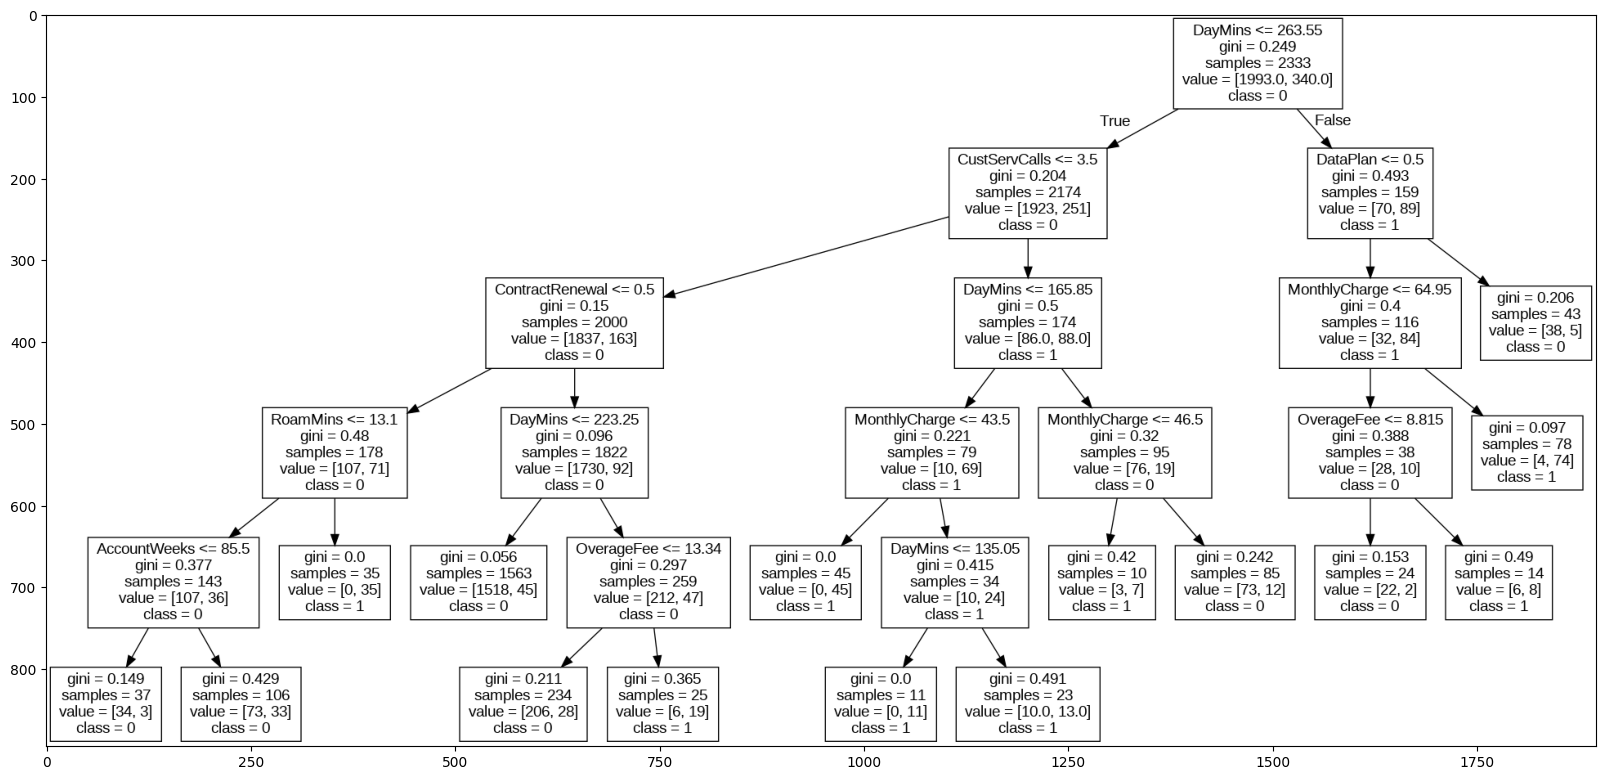

In [51]:
export_graphviz(dt2,
                'tree.dot',
                class_names=['0','1'],
                feature_names = X_train.columns)
! dot -Tpng tree.dot -o tree.png

%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 40))
plt.imshow(img)

Make predictions on the training and test data

In [52]:
# make predictions on the training and test data
y_pred_train = dt2.predict(X_train)
y_pred_test = dt2.predict(X_test)

y_prob_train = dt2.predict_proba(X_train)
y_prob_test = dt2.predict_proba(X_test)

In [53]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.9327
Precision: 0.8797
Recall.  : 0.6235

 -- test set -- 
Accuracy : 0.9290
Precision: 0.8396
Recall.  : 0.6224


In [54]:
# confusion matrix
conf_matrix = confusion_matrix(y_pred_train, y_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(y_pred_test, y_test)
print(conf_matrix)

[[1964  128]
 [  29  212]]
[[840  54]
 [ 17  89]]


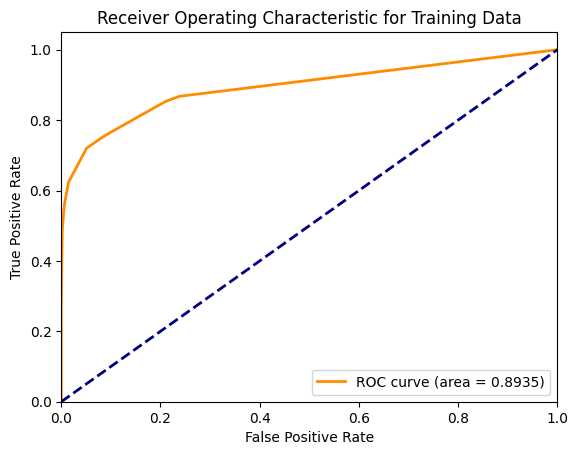

In [55]:
# Generate ROC curve for training data

fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_prob_train[:,1])
roc_auc = roc_auc_score(y_train.cat.codes, y_prob_train[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

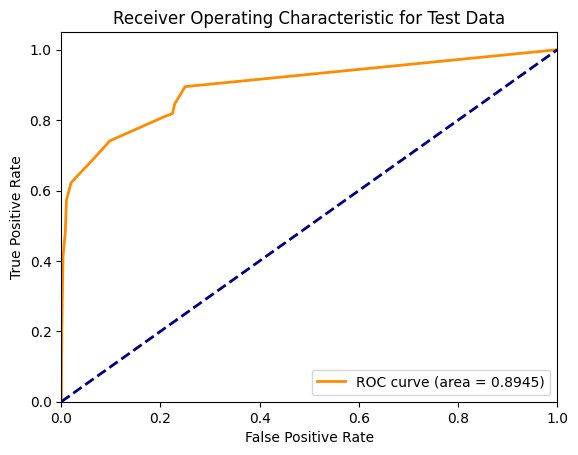

In [56]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_prob_test[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_prob_test[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()

   importance          feature
5    0.345085          DayMins
4    0.179486    CustServCalls
1    0.122609  ContractRenewal
7    0.102658    MonthlyCharge
9    0.098074         RoamMins
2    0.072212         DataPlan
8    0.070820       OverageFee
0    0.009057     AccountWeeks
3    0.000000        DataUsage
6    0.000000         DayCalls


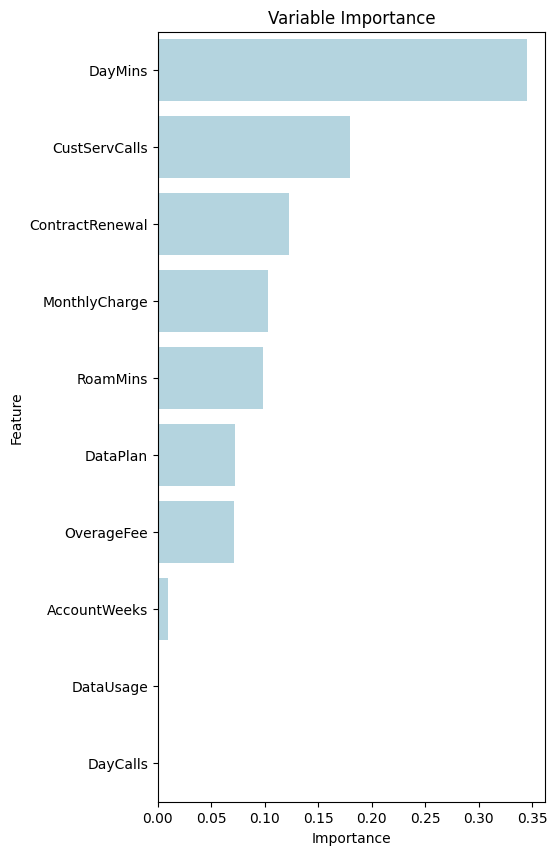

In [57]:
#calculate feature importance
tree_imp = dt2.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = tree_imp,
                  columns = column_values)
df['feature']=X.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False)

print(df2)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()